# Old Collection Access Pattern

The non-typed way of accessing xAOD collections is supported for now, but is depreciated, and eventually, will stop working. There isn't a lot different from the typed method. However, much less of the xAOD is defined, so watch out for holes.

In [2]:
from config import ds_zee_untyped

import matplotlib.pyplot as plt

In [3]:
jets = (ds_zee_untyped
          .SelectMany(lambda e: (e.Jets("AntiKt4EMTopoJets")))
          .Where(lambda j: (j.pt()/1000)>30)
          .Select(lambda j: (j.pt()/1000.0))
          .AsPandasDF("JetPt")
          .value())

There are several things to note. First, you'll see two warning messages if you are running in local mode:

```text
Warning: assuming that the method 'xAOD::Jet::pt(...)' has return type 'double'. Use cpp_types.add_method_type_info to suppress (or correct) this warning.
Warning: assuming that the method 'xAOD::Jet::pt(...)' has return type 'double'. Use cpp_types.add_method_type_info to suppress (or correct) this warning.
```
 Those indicate that the backend wasn't sent type information and so made the assumption that jet `pt` was a double return type. In this case, a good guess.

A few other things:

* No corrections were applied. These are the raw data from the xAOD file. This is a DAOD_PHYS file, so that won't be correct.
* Only a limited number of collections are known (Jets, Muons, Electrons, Tracks).

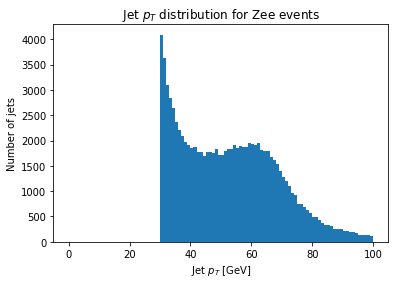

In [4]:
plt.hist(jets.JetPt, bins=100, range=(0, 100))
plt.xlabel('Jet $p_T$ [GeV]')
plt.ylabel('Number of jets')
_ = plt.title('Jet $p_T$ distribution for Zee events')